In [946]:
import pandas as pd
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import ComplementNB, GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.impute import SimpleImputer
import xgboost as xgb

In [778]:
# merging the files
joined_files = os.path.join("data/EPL/", "EPL*.csv")
  
# A list of all joined files is returned
joined_list = glob.glob(joined_files)

In [779]:
joined_list

['data/EPL/EPL2007-2008.csv',
 'data/EPL/EPL2003-2004.csv',
 'data/EPL/EPL2015-2016.csv',
 'data/EPL/EPL2009-2010.csv',
 'data/EPL/EPL2014-2015.csv',
 'data/EPL/EPL2004-2005.csv',
 'data/EPL/EPL2013-2014.csv',
 'data/EPL/EPL2005-2006.csv',
 'data/EPL/EPL2017-2018.csv',
 'data/EPL/EPL2012-2013.csv',
 'data/EPL/EPL2019-2020.csv',
 'data/EPL/EPL2016-2017.csv',
 'data/EPL/EPL2018-2019.csv',
 'data/EPL/EPL2008-2009.csv',
 'data/EPL/EPL2011-2012.csv',
 'data/EPL/EPL2010-2011.csv',
 'data/EPL/EPL2006-2007.csv',
 'data/EPL/EPL2020-2021.csv']

In [780]:
joined_list

['data/EPL/EPL2007-2008.csv',
 'data/EPL/EPL2003-2004.csv',
 'data/EPL/EPL2015-2016.csv',
 'data/EPL/EPL2009-2010.csv',
 'data/EPL/EPL2014-2015.csv',
 'data/EPL/EPL2004-2005.csv',
 'data/EPL/EPL2013-2014.csv',
 'data/EPL/EPL2005-2006.csv',
 'data/EPL/EPL2017-2018.csv',
 'data/EPL/EPL2012-2013.csv',
 'data/EPL/EPL2019-2020.csv',
 'data/EPL/EPL2016-2017.csv',
 'data/EPL/EPL2018-2019.csv',
 'data/EPL/EPL2008-2009.csv',
 'data/EPL/EPL2011-2012.csv',
 'data/EPL/EPL2010-2011.csv',
 'data/EPL/EPL2006-2007.csv',
 'data/EPL/EPL2020-2021.csv']

In [781]:
for x in range(len(joined_list)):
    print(joined_list[x])
    test = pd.read_csv(joined_list[x])
    
    print(test.shape)
    print(test.columns)
    print("*"*20)

data/EPL/EPL2007-2008.csv
(380, 71)
Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC',
       'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD',
       'BWA', 'GBH', 'GBD', 'GBA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA',
       'SBH', 'SBD', 'SBA', 'WHH', 'WHD', 'WHA', 'SJH', 'SJD', 'SJA', 'VCH',
       'VCD', 'VCA', 'BSH', 'BSD', 'BSA', 'Bb1X2', 'BbMxH', 'BbAvH', 'BbMxD',
       'BbAvD', 'BbMxA', 'BbAvA', 'BbOU', 'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5',
       'BbAv<2.5', 'BbAH', 'BbAHh', 'BbMxAHH', 'BbAvAHH', 'BbMxAHA',
       'BbAvAHA'],
      dtype='object')
********************
data/EPL/EPL2003-2004.csv
(380, 57)
Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC',
       'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'GBH', 'GBD',
       'GBA', 'IWH', 'I

(380, 71)
Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC',
       'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD',
       'BWA', 'GBH', 'GBD', 'GBA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA',
       'SBH', 'SBD', 'SBA', 'WHH', 'WHD', 'WHA', 'SJH', 'SJD', 'SJA', 'VCH',
       'VCD', 'VCA', 'BSH', 'BSD', 'BSA', 'Bb1X2', 'BbMxH', 'BbAvH', 'BbMxD',
       'BbAvD', 'BbMxA', 'BbAvA', 'BbOU', 'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5',
       'BbAv<2.5', 'BbAH', 'BbAHh', 'BbMxAHH', 'BbAvAHH', 'BbMxAHA',
       'BbAvAHA'],
      dtype='object')
********************
data/EPL/EPL2011-2012.csv
(380, 71)
Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC',
       'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD',
       'BWA', 'GBH', 'GBD', 'GBA', 'IWH', 'IWD', 

In [782]:
df = pd.concat(map(pd.read_csv, joined_list), ignore_index=True)

In [783]:
# Finally, the files are joined
df = pd.concat(map(pd.read_csv, joined_list), ignore_index=True)
df

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,11/08/07,Aston Villa,Liverpool,1.0,2.0,A,0.0,1.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E0,11/08/07,Bolton,Newcastle,1.0,3.0,A,0.0,3.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E0,11/08/07,Derby,Portsmouth,2.0,2.0,D,1.0,1.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E0,11/08/07,Everton,Wigan,2.0,1.0,H,1.0,0.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E0,11/08/07,Middlesbrough,Blackburn,1.0,2.0,A,1.0,0.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6640,E0,19/01/2021,West Ham,West Brom,2.0,1.0,H,1.0,0.0,H,...,2.08,-1.00,1.88,2.02,1.90,2.03,1.94,2.06,1.89,1.98
6641,E0,19/01/2021,Leicester,Chelsea,2.0,0.0,H,2.0,0.0,H,...,2.01,0.00,2.05,1.85,2.08,1.85,2.09,1.92,2.03,1.84
6642,E0,20/01/2021,Man City,Aston Villa,2.0,0.0,H,0.0,0.0,D,...,2.62,-1.50,1.98,1.95,1.97,1.95,2.00,2.07,1.92,1.95
6643,E0,20/01/2021,Fulham,Man United,1.0,2.0,A,1.0,1.0,D,...,2.15,1.00,1.75,2.05,1.79,2.15,1.90,2.16,1.80,2.09


In [784]:
df['Date'] = pd.to_datetime(df['Date'])

In [785]:
df

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,2007-11-08,Aston Villa,Liverpool,1.0,2.0,A,0.0,1.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E0,2007-11-08,Bolton,Newcastle,1.0,3.0,A,0.0,3.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E0,2007-11-08,Derby,Portsmouth,2.0,2.0,D,1.0,1.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E0,2007-11-08,Everton,Wigan,2.0,1.0,H,1.0,0.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E0,2007-11-08,Middlesbrough,Blackburn,1.0,2.0,A,1.0,0.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6640,E0,2021-01-19,West Ham,West Brom,2.0,1.0,H,1.0,0.0,H,...,2.08,-1.00,1.88,2.02,1.90,2.03,1.94,2.06,1.89,1.98
6641,E0,2021-01-19,Leicester,Chelsea,2.0,0.0,H,2.0,0.0,H,...,2.01,0.00,2.05,1.85,2.08,1.85,2.09,1.92,2.03,1.84
6642,E0,2021-01-20,Man City,Aston Villa,2.0,0.0,H,0.0,0.0,D,...,2.62,-1.50,1.98,1.95,1.97,1.95,2.00,2.07,1.92,1.95
6643,E0,2021-01-20,Fulham,Man United,1.0,2.0,A,1.0,1.0,D,...,2.15,1.00,1.75,2.05,1.79,2.15,1.90,2.16,1.80,2.09


In [786]:
df = df.sort_values(by='Date')
df

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
480,E0,2003-01-11,Everton,Chelsea,0.0,1.0,A,0.0,0.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
486,E0,2003-01-11,Tottenham,Bolton,0.0,1.0,A,0.0,0.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
485,E0,2003-01-11,Southampton,Man City,0.0,2.0,A,0.0,1.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
484,E0,2003-01-11,Newcastle,Aston Villa,1.0,1.0,D,1.0,1.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
481,E0,2003-01-11,Leeds,Arsenal,1.0,4.0,A,0.0,3.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6624,E0,2021-04-01,Southampton,Liverpool,1.0,0.0,H,1.0,0.0,H,...,2.78,1.25,1.77,2.02,1.87,2.07,1.92,2.13,1.84,2.04
6627,E0,2021-12-01,Wolves,Everton,1.0,2.0,A,1.0,1.0,D,...,1.53,0.00,1.82,2.11,1.82,2.13,1.84,2.19,1.77,2.12
6626,E0,2021-12-01,Burnley,Man United,0.0,1.0,A,0.0,0.0,D,...,2.26,1.25,2.02,1.91,2.00,1.93,2.04,1.94,1.98,1.90
6625,E0,2021-12-01,Sheffield United,Newcastle,1.0,0.0,H,0.0,0.0,D,...,1.59,-0.25,1.99,1.94,1.99,1.93,2.10,1.96,1.97,1.92


In [787]:
df = df[df['Div'] == 'E0']

In [788]:
df

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
480,E0,2003-01-11,Everton,Chelsea,0.0,1.0,A,0.0,0.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
486,E0,2003-01-11,Tottenham,Bolton,0.0,1.0,A,0.0,0.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
485,E0,2003-01-11,Southampton,Man City,0.0,2.0,A,0.0,1.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
484,E0,2003-01-11,Newcastle,Aston Villa,1.0,1.0,D,1.0,1.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
481,E0,2003-01-11,Leeds,Arsenal,1.0,4.0,A,0.0,3.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6622,E0,2021-03-01,Newcastle,Leicester,1.0,2.0,A,0.0,0.0,D,...,1.97,1.00,1.90,2.00,1.92,2.01,1.96,2.08,1.86,2.01
6624,E0,2021-04-01,Southampton,Liverpool,1.0,0.0,H,1.0,0.0,H,...,2.78,1.25,1.77,2.02,1.87,2.07,1.92,2.13,1.84,2.04
6627,E0,2021-12-01,Wolves,Everton,1.0,2.0,A,1.0,1.0,D,...,1.53,0.00,1.82,2.11,1.82,2.13,1.84,2.19,1.77,2.12
6626,E0,2021-12-01,Burnley,Man United,0.0,1.0,A,0.0,0.0,D,...,2.26,1.25,2.02,1.91,2.00,1.93,2.04,1.94,1.98,1.90


In [789]:
df.isna().sum()

Div            0
Date           0
HomeTeam       0
AwayTeam       0
FTHG           0
            ... 
PCAHA       6080
MaxCAHH     6080
MaxCAHA     6080
AvgCAHH     6080
AvgCAHA     6080
Length: 151, dtype: int64

In [790]:
# Dropping irrevelant betting columns 
# Focusing mainly 365 bets
df.drop(df.iloc[:, 26:], inplace=True, axis=1)

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [791]:
df

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A
480,E0,2003-01-11,Everton,Chelsea,0.0,1.0,A,0.0,0.0,D,...,11.0,3.0,1.0,0.0,0.0,0.0,0.0,4.50,3.40,1.72
486,E0,2003-01-11,Tottenham,Bolton,0.0,1.0,A,0.0,0.0,D,...,6.0,7.0,5.0,3.0,0.0,0.0,0.0,1.72,3.40,4.50
485,E0,2003-01-11,Southampton,Man City,0.0,2.0,A,0.0,1.0,A,...,16.0,4.0,6.0,1.0,1.0,0.0,0.0,2.20,3.40,2.87
484,E0,2003-01-11,Newcastle,Aston Villa,1.0,1.0,D,1.0,1.0,D,...,17.0,15.0,3.0,2.0,3.0,0.0,1.0,1.57,3.60,5.50
481,E0,2003-01-11,Leeds,Arsenal,1.0,4.0,A,0.0,3.0,A,...,11.0,4.0,3.0,1.0,0.0,0.0,0.0,5.50,3.60,1.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6622,E0,2021-03-01,Newcastle,Leicester,1.0,2.0,A,0.0,0.0,D,...,11.0,3.0,6.0,0.0,2.0,0.0,0.0,5.25,4.20,1.61
6624,E0,2021-04-01,Southampton,Liverpool,1.0,0.0,H,1.0,0.0,H,...,12.0,1.0,10.0,1.0,3.0,0.0,0.0,5.00,4.33,1.61
6627,E0,2021-12-01,Wolves,Everton,1.0,2.0,A,1.0,1.0,D,...,11.0,6.0,5.0,2.0,2.0,0.0,0.0,2.45,3.10,3.10
6626,E0,2021-12-01,Burnley,Man United,0.0,1.0,A,0.0,0.0,D,...,13.0,3.0,4.0,1.0,2.0,0.0,0.0,7.00,4.50,1.45


In [792]:
#Dropping irrevelant column 
df = df.drop(columns='Div')

In [793]:
df

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A
480,2003-01-11,Everton,Chelsea,0.0,1.0,A,0.0,0.0,D,J Winter,...,11.0,3.0,1.0,0.0,0.0,0.0,0.0,4.50,3.40,1.72
486,2003-01-11,Tottenham,Bolton,0.0,1.0,A,0.0,0.0,D,U Rennie,...,6.0,7.0,5.0,3.0,0.0,0.0,0.0,1.72,3.40,4.50
485,2003-01-11,Southampton,Man City,0.0,2.0,A,0.0,1.0,A,A Wiley,...,16.0,4.0,6.0,1.0,1.0,0.0,0.0,2.20,3.40,2.87
484,2003-01-11,Newcastle,Aston Villa,1.0,1.0,D,1.0,1.0,D,M Messias,...,17.0,15.0,3.0,2.0,3.0,0.0,1.0,1.57,3.60,5.50
481,2003-01-11,Leeds,Arsenal,1.0,4.0,A,0.0,3.0,A,M Dean,...,11.0,4.0,3.0,1.0,0.0,0.0,0.0,5.50,3.60,1.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6622,2021-03-01,Newcastle,Leicester,1.0,2.0,A,0.0,0.0,D,R Jones,...,11.0,3.0,6.0,0.0,2.0,0.0,0.0,5.25,4.20,1.61
6624,2021-04-01,Southampton,Liverpool,1.0,0.0,H,1.0,0.0,H,A Marriner,...,12.0,1.0,10.0,1.0,3.0,0.0,0.0,5.00,4.33,1.61
6627,2021-12-01,Wolves,Everton,1.0,2.0,A,1.0,1.0,D,M Atkinson,...,11.0,6.0,5.0,2.0,2.0,0.0,0.0,2.45,3.10,3.10
6626,2021-12-01,Burnley,Man United,0.0,1.0,A,0.0,0.0,D,K Friend,...,13.0,3.0,4.0,1.0,2.0,0.0,0.0,7.00,4.50,1.45


In [794]:
# Renaming Columns for better understanding
df.columns = ['Date','HomeTeam','AwayTeam','FT_Home_Goal','FT_Away_Goal','FT_Result','HT_Home_Goal','HT_Away_Goal',
                        'HT_Result','Referee','H_Shots','A_Shots','H_Shots_Target','A_Shots_Target','H_Foul',
                        'A_Foul','H_Corner','A_Corner','H_Yellow','A_Yellow','H_Red','A_Red', 'HomeOdds', 'DrawOdds', 'AwayOdds']

In [795]:
df

,Date,HomeTeam,AwayTeam,FT_Home_Goal,FT_Away_Goal,FT_Result,HT_Home_Goal,HT_Away_Goal,HT_Result,Referee,...,A_Foul,H_Corner,A_Corner,H_Yellow,A_Yellow,H_Red,A_Red,HomeOdds,DrawOdds,AwayOdds
480,2003-01-11,Everton,Chelsea,0.0,1.0,A,0.0,0.0,D,J Winter,...,11.0,3.0,1.0,0.0,0.0,0.0,0.0,4.50,3.40,1.72
486,2003-01-11,Tottenham,Bolton,0.0,1.0,A,0.0,0.0,D,U Rennie,...,6.0,7.0,5.0,3.0,0.0,0.0,0.0,1.72,3.40,4.50
485,2003-01-11,Southampton,Man City,0.0,2.0,A,0.0,1.0,A,A Wiley,...,16.0,4.0,6.0,1.0,1.0,0.0,0.0,2.20,3.40,2.87
484,2003-01-11,Newcastle,Aston Villa,1.0,1.0,D,1.0,1.0,D,M Messias,...,17.0,15.0,3.0,2.0,3.0,0.0,1.0,1.57,3.60,5.50
481,2003-01-11,Leeds,Arsenal,1.0,4.0,A,0.0,3.0,A,M Dean,...,11.0,4.0,3.0,1.0,0.0,0.0,0.0,5.50,3.60,1.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6622,2021-03-01,Newcastle,Leicester,1.0,2.0,A,0.0,0.0,D,R Jones,...,11.0,3.0,6.0,0.0,2.0,0.0,0.0,5.25,4.20,1.61
6624,2021-04-01,Southampton,Liverpool,1.0,0.0,H,1.0,0.0,H,A Marriner,...,12.0,1.0,10.0,1.0,3.0,0.0,0.0,5.00,4.33,1.61
6627,2021-12-01,Wolves,Everton,1.0,2.0,A,1.0,1.0,D,M Atkinson,...,11.0,6.0,5.0,2.0,2.0,0.0,0.0,2.45,3.10,3.10
6626,2021-12-01,Burnley,Man United,0.0,1.0,A,0.0,0.0,D,K Friend,...,13.0,3.0,4.0,1.0,2.0,0.0,0.0,7.00,4.50,1.45


In [796]:
df.dtypes

Date              datetime64[ns]
HomeTeam                  object
AwayTeam                  object
FT_Home_Goal             float64
FT_Away_Goal             float64
FT_Result                 object
HT_Home_Goal             float64
HT_Away_Goal             float64
HT_Result                 object
Referee                   object
H_Shots                  float64
A_Shots                  float64
H_Shots_Target           float64
A_Shots_Target           float64
H_Foul                   float64
A_Foul                   float64
H_Corner                 float64
A_Corner                 float64
H_Yellow                 float64
A_Yellow                 float64
H_Red                    float64
A_Red                    float64
HomeOdds                 float64
DrawOdds                 float64
AwayOdds                 float64
dtype: object

In [797]:
 df.columns.values

array(['Date', 'HomeTeam', 'AwayTeam', 'FT_Home_Goal', 'FT_Away_Goal',
       'FT_Result', 'HT_Home_Goal', 'HT_Away_Goal', 'HT_Result',
       'Referee', 'H_Shots', 'A_Shots', 'H_Shots_Target',
       'A_Shots_Target', 'H_Foul', 'A_Foul', 'H_Corner', 'A_Corner',
       'H_Yellow', 'A_Yellow', 'H_Red', 'A_Red', 'HomeOdds', 'DrawOdds',
       'AwayOdds'], dtype=object)

In [798]:
# Dropped irrevelant data that cant forecast a game prior 
df.drop(['Referee', 'H_Foul', 'A_Foul', 'H_Corner', 'A_Corner',
         'H_Yellow', 'A_Yellow', 'H_Red', 'A_Red'], axis=1, inplace=True)

In [799]:
df

,Date,HomeTeam,AwayTeam,FT_Home_Goal,FT_Away_Goal,FT_Result,HT_Home_Goal,HT_Away_Goal,HT_Result,H_Shots,A_Shots,H_Shots_Target,A_Shots_Target,HomeOdds,DrawOdds,AwayOdds
480,2003-01-11,Everton,Chelsea,0.0,1.0,A,0.0,0.0,D,12.0,17.0,4.0,7.0,4.50,3.40,1.72
486,2003-01-11,Tottenham,Bolton,0.0,1.0,A,0.0,0.0,D,10.0,25.0,6.0,15.0,1.72,3.40,4.50
485,2003-01-11,Southampton,Man City,0.0,2.0,A,0.0,1.0,A,8.0,13.0,5.0,9.0,2.20,3.40,2.87
484,2003-01-11,Newcastle,Aston Villa,1.0,1.0,D,1.0,1.0,D,22.0,11.0,13.0,6.0,1.57,3.60,5.50
481,2003-01-11,Leeds,Arsenal,1.0,4.0,A,0.0,3.0,A,9.0,13.0,5.0,9.0,5.50,3.60,1.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6622,2021-03-01,Newcastle,Leicester,1.0,2.0,A,0.0,0.0,D,8.0,9.0,2.0,3.0,5.25,4.20,1.61
6624,2021-04-01,Southampton,Liverpool,1.0,0.0,H,1.0,0.0,H,7.0,17.0,3.0,1.0,5.00,4.33,1.61
6627,2021-12-01,Wolves,Everton,1.0,2.0,A,1.0,1.0,D,12.0,5.0,3.0,3.0,2.45,3.10,3.10
6626,2021-12-01,Burnley,Man United,0.0,1.0,A,0.0,0.0,D,11.0,13.0,0.0,7.0,7.00,4.50,1.45


In [800]:
# If the home team wins its true 
# If the away team wins its false 
# If they draw then its false 
def Winner(Result):
    if Result == 'H':
        return 1
    if Result == 'A':
        return -1
    else:
        return 0
# create a new column based on condition
df['Winner'] = df['FT_Result'].apply(Winner)
# display the dataframe
df

,Date,HomeTeam,AwayTeam,FT_Home_Goal,FT_Away_Goal,FT_Result,HT_Home_Goal,HT_Away_Goal,HT_Result,H_Shots,A_Shots,H_Shots_Target,A_Shots_Target,HomeOdds,DrawOdds,AwayOdds,Winner
480,2003-01-11,Everton,Chelsea,0.0,1.0,A,0.0,0.0,D,12.0,17.0,4.0,7.0,4.50,3.40,1.72,-1
486,2003-01-11,Tottenham,Bolton,0.0,1.0,A,0.0,0.0,D,10.0,25.0,6.0,15.0,1.72,3.40,4.50,-1
485,2003-01-11,Southampton,Man City,0.0,2.0,A,0.0,1.0,A,8.0,13.0,5.0,9.0,2.20,3.40,2.87,-1
484,2003-01-11,Newcastle,Aston Villa,1.0,1.0,D,1.0,1.0,D,22.0,11.0,13.0,6.0,1.57,3.60,5.50,0
481,2003-01-11,Leeds,Arsenal,1.0,4.0,A,0.0,3.0,A,9.0,13.0,5.0,9.0,5.50,3.60,1.57,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6622,2021-03-01,Newcastle,Leicester,1.0,2.0,A,0.0,0.0,D,8.0,9.0,2.0,3.0,5.25,4.20,1.61,-1
6624,2021-04-01,Southampton,Liverpool,1.0,0.0,H,1.0,0.0,H,7.0,17.0,3.0,1.0,5.00,4.33,1.61,1
6627,2021-12-01,Wolves,Everton,1.0,2.0,A,1.0,1.0,D,12.0,5.0,3.0,3.0,2.45,3.10,3.10,-1
6626,2021-12-01,Burnley,Man United,0.0,1.0,A,0.0,0.0,D,11.0,13.0,0.0,7.0,7.00,4.50,1.45,-1


In [801]:
def HomeAdvantage(Result):
    if Result == 'H':
        return 1
    else:
        return 0
# create a new column based on condition
df['Home_Advantage'] = df['FT_Result'].apply(HomeAdvantage)
# display the dataframe
df

,Date,HomeTeam,AwayTeam,FT_Home_Goal,FT_Away_Goal,FT_Result,HT_Home_Goal,HT_Away_Goal,HT_Result,H_Shots,A_Shots,H_Shots_Target,A_Shots_Target,HomeOdds,DrawOdds,AwayOdds,Winner,Home_Advantage
480,2003-01-11,Everton,Chelsea,0.0,1.0,A,0.0,0.0,D,12.0,17.0,4.0,7.0,4.50,3.40,1.72,-1,0
486,2003-01-11,Tottenham,Bolton,0.0,1.0,A,0.0,0.0,D,10.0,25.0,6.0,15.0,1.72,3.40,4.50,-1,0
485,2003-01-11,Southampton,Man City,0.0,2.0,A,0.0,1.0,A,8.0,13.0,5.0,9.0,2.20,3.40,2.87,-1,0
484,2003-01-11,Newcastle,Aston Villa,1.0,1.0,D,1.0,1.0,D,22.0,11.0,13.0,6.0,1.57,3.60,5.50,0,0
481,2003-01-11,Leeds,Arsenal,1.0,4.0,A,0.0,3.0,A,9.0,13.0,5.0,9.0,5.50,3.60,1.57,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6622,2021-03-01,Newcastle,Leicester,1.0,2.0,A,0.0,0.0,D,8.0,9.0,2.0,3.0,5.25,4.20,1.61,-1,0
6624,2021-04-01,Southampton,Liverpool,1.0,0.0,H,1.0,0.0,H,7.0,17.0,3.0,1.0,5.00,4.33,1.61,1,1
6627,2021-12-01,Wolves,Everton,1.0,2.0,A,1.0,1.0,D,12.0,5.0,3.0,3.0,2.45,3.10,3.10,-1,0
6626,2021-12-01,Burnley,Man United,0.0,1.0,A,0.0,0.0,D,11.0,13.0,0.0,7.0,7.00,4.50,1.45,-1,0


In [802]:
df['Home_Advantage'] = df['Home_Advantage'].astype(float)

In [803]:
df

,Date,HomeTeam,AwayTeam,FT_Home_Goal,FT_Away_Goal,FT_Result,HT_Home_Goal,HT_Away_Goal,HT_Result,H_Shots,A_Shots,H_Shots_Target,A_Shots_Target,HomeOdds,DrawOdds,AwayOdds,Winner,Home_Advantage
480,2003-01-11,Everton,Chelsea,0.0,1.0,A,0.0,0.0,D,12.0,17.0,4.0,7.0,4.50,3.40,1.72,-1,0.0
486,2003-01-11,Tottenham,Bolton,0.0,1.0,A,0.0,0.0,D,10.0,25.0,6.0,15.0,1.72,3.40,4.50,-1,0.0
485,2003-01-11,Southampton,Man City,0.0,2.0,A,0.0,1.0,A,8.0,13.0,5.0,9.0,2.20,3.40,2.87,-1,0.0
484,2003-01-11,Newcastle,Aston Villa,1.0,1.0,D,1.0,1.0,D,22.0,11.0,13.0,6.0,1.57,3.60,5.50,0,0.0
481,2003-01-11,Leeds,Arsenal,1.0,4.0,A,0.0,3.0,A,9.0,13.0,5.0,9.0,5.50,3.60,1.57,-1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6622,2021-03-01,Newcastle,Leicester,1.0,2.0,A,0.0,0.0,D,8.0,9.0,2.0,3.0,5.25,4.20,1.61,-1,0.0
6624,2021-04-01,Southampton,Liverpool,1.0,0.0,H,1.0,0.0,H,7.0,17.0,3.0,1.0,5.00,4.33,1.61,1,1.0
6627,2021-12-01,Wolves,Everton,1.0,2.0,A,1.0,1.0,D,12.0,5.0,3.0,3.0,2.45,3.10,3.10,-1,0.0
6626,2021-12-01,Burnley,Man United,0.0,1.0,A,0.0,0.0,D,11.0,13.0,0.0,7.0,7.00,4.50,1.45,-1,0.0


In [804]:
gd = pd.read_csv('data/final_dataset_with_odds.csv')

In [805]:
gd

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,...,B365A,IWH,IWD,IWA,LBH,LBD,LBA,WHH,WHD,WHA
0,0,2002-08-17,Blackburn,Sunderland,0,0,NH,0,0,0,...,4.333,1.80,3.1,3.80,1.615,3.25,5.00,1.66,3.30,4.50
1,1,2002-08-17,Charlton,Chelsea,2,3,NH,0,0,0,...,2.200,2.90,3.0,2.20,2.800,3.20,2.20,2.75,3.10,2.30
2,2,2002-08-17,Everton,Tottenham,2,2,NH,0,0,0,...,2.750,2.30,3.0,2.70,2.250,3.20,2.75,2.30,3.10,2.75
3,3,2002-08-17,Fulham,Bolton,4,1,H,0,0,0,...,4.333,1.80,3.1,3.80,1.833,3.20,3.75,1.72,3.20,4.33
4,4,2002-08-17,Leeds,Man City,3,0,H,0,0,0,...,4.500,1.70,3.2,4.20,1.615,3.50,4.50,1.66,3.30,4.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,5995,2018-12-15,Watford,Cardiff,3,2,H,20,15,23,...,6.000,1.70,3.8,5.00,1.630,3.99,6.37,1.60,3.90,6.00
5996,5996,2018-12-15,Wolves,Bournemouth,2,0,H,17,25,19,...,4.330,2.00,3.4,3.80,2.020,3.48,4.20,1.95,3.50,4.00
5997,5997,2018-12-16,Brighton,Chelsea,1,2,NH,19,33,22,...,1.500,7.20,4.4,1.45,7.640,4.37,1.51,7.00,4.33,1.47
5998,5998,2018-12-16,Liverpool,Man United,3,1,H,34,28,6,...,6.000,1.65,4.0,5.10,1.530,4.51,6.76,1.52,4.33,6.00


In [806]:
gd['Date'] = pd.to_datetime(gd['Date'])

In [807]:
gd = gd.sort_values(by='Date')

In [808]:
gd

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,...,B365A,IWH,IWD,IWA,LBH,LBD,LBA,WHH,WHD,WHA
0,0,2002-08-17,Blackburn,Sunderland,0,0,NH,0,0,0,...,4.333,1.80,3.1,3.80,1.615,3.25,5.00,1.66,3.30,4.50
1,1,2002-08-17,Charlton,Chelsea,2,3,NH,0,0,0,...,2.200,2.90,3.0,2.20,2.800,3.20,2.20,2.75,3.10,2.30
2,2,2002-08-17,Everton,Tottenham,2,2,NH,0,0,0,...,2.750,2.30,3.0,2.70,2.250,3.20,2.75,2.30,3.10,2.75
3,3,2002-08-17,Fulham,Bolton,4,1,H,0,0,0,...,4.333,1.80,3.1,3.80,1.833,3.20,3.75,1.72,3.20,4.33
4,4,2002-08-17,Leeds,Man City,3,0,H,0,0,0,...,4.500,1.70,3.2,4.20,1.615,3.50,4.50,1.66,3.30,4.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5994,5994,2018-12-15,Tottenham,Burnley,1,0,H,30,15,16,...,19.000,1.20,7.0,13.00,1.180,7.74,18.36,1.15,8.00,15.00
5996,5996,2018-12-15,Wolves,Bournemouth,2,0,H,17,25,19,...,4.330,2.00,3.4,3.80,2.020,3.48,4.20,1.95,3.50,4.00
5998,5998,2018-12-16,Liverpool,Man United,3,1,H,34,28,6,...,6.000,1.65,4.0,5.10,1.530,4.51,6.76,1.52,4.33,6.00
5997,5997,2018-12-16,Brighton,Chelsea,1,2,NH,19,33,22,...,1.500,7.20,4.4,1.45,7.640,4.37,1.51,7.00,4.33,1.47


In [809]:
gd = gd[gd['Date'] >= '2004-08-14']

In [810]:
gd

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,...,B365A,IWH,IWD,IWA,LBH,LBD,LBA,WHH,WHD,WHA
671,671,2004-08-14,Portsmouth,Birmingham,1,1,NH,0,0,0,...,2.87,2.30,3.0,2.70,2.38,3.20,2.60,2.30,3.20,2.62
665,665,2004-08-14,Aston Villa,Southampton,2,0,H,0,0,0,...,4.33,1.85,3.1,3.60,1.73,3.20,4.33,1.80,3.10,4.00
666,666,2004-08-14,Blackburn,West Brom,1,1,NH,0,0,0,...,5.00,1.80,3.1,3.80,1.67,3.25,4.50,1.90,2.87,4.00
667,667,2004-08-14,Bolton,Charlton,4,1,H,0,0,0,...,3.10,2.20,3.0,2.90,2.20,3.00,3.00,2.15,3.20,2.90
668,668,2004-08-14,Man City,Fulham,1,1,NH,0,0,0,...,3.40,2.00,3.1,3.20,2.10,3.20,3.00,2.05,3.10,3.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5994,5994,2018-12-15,Tottenham,Burnley,1,0,H,30,15,16,...,19.00,1.20,7.0,13.00,1.18,7.74,18.36,1.15,8.00,15.00
5996,5996,2018-12-15,Wolves,Bournemouth,2,0,H,17,25,19,...,4.33,2.00,3.4,3.80,2.02,3.48,4.20,1.95,3.50,4.00
5998,5998,2018-12-16,Liverpool,Man United,3,1,H,34,28,6,...,6.00,1.65,4.0,5.10,1.53,4.51,6.76,1.52,4.33,6.00
5997,5997,2018-12-16,Brighton,Chelsea,1,2,NH,19,33,22,...,1.50,7.20,4.4,1.45,7.64,4.37,1.51,7.00,4.33,1.47


In [811]:
gd.drop(gd.iloc[:, 46:], inplace=True, axis=1)

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [812]:
gd

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,...,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP,B365H,B365D,B365A
671,671,2004-08-14,Portsmouth,Birmingham,1,1,NH,0,0,0,...,0,0,0.000000,0.000000,0.000000,0.000000,3.0,2.40,3.20,2.87
665,665,2004-08-14,Aston Villa,Southampton,2,0,H,0,0,0,...,0,0,0.000000,0.000000,0.000000,0.000000,-6.0,1.90,3.10,4.33
666,666,2004-08-14,Blackburn,West Brom,1,1,NH,0,0,0,...,0,0,0.000000,0.000000,0.000000,0.000000,-3.0,1.80,3.10,5.00
667,667,2004-08-14,Bolton,Charlton,4,1,H,0,0,0,...,0,0,0.000000,0.000000,0.000000,0.000000,1.0,2.25,3.20,3.10
668,668,2004-08-14,Man City,Fulham,1,1,NH,0,0,0,...,0,0,0.000000,0.000000,0.000000,0.000000,7.0,2.10,3.25,3.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5994,5994,2018-12-15,Tottenham,Burnley,1,0,H,30,15,16,...,0,0,0.823529,-1.000000,1.411765,0.470588,-4.0,1.18,8.00,19.00
5996,5996,2018-12-15,Wolves,Bournemouth,2,0,H,17,25,19,...,1,0,-0.117647,-0.058824,-0.058824,0.235294,6.0,1.95,3.60,4.33
5998,5998,2018-12-16,Liverpool,Man United,3,1,H,34,28,6,...,0,0,1.647059,0.117647,0.941176,0.529412,2.0,1.57,4.50,6.00
5997,5997,2018-12-16,Brighton,Chelsea,1,2,NH,19,33,22,...,0,0,-0.176471,1.176471,-0.764706,0.000000,10.0,7.50,4.50,1.50


In [813]:
gd.columns.values

array(['Unnamed: 0', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG',
       'FTR', 'HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2',
       'HM3', 'HM4', 'HM5', 'AM1', 'AM2', 'AM3', 'AM4', 'AM5',
       'HomeTeamLP', 'AwayTeamLP', 'MW', 'HTFormPtsStr', 'ATFormPtsStr',
       'HTFormPts', 'ATFormPts', 'HTWinStreak3', 'HTWinStreak5',
       'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3', 'ATWinStreak5',
       'ATLossStreak3', 'ATLossStreak5', 'HTGD', 'ATGD', 'DiffPts',
       'DiffFormPts', 'DiffLP', 'B365H', 'B365D', 'B365A'], dtype=object)

In [814]:
# Focusing on 2003-2018 seasons to be more accurate
df = df[df['Date'] >= '2004-08-14'] 

In [815]:
# Focusing on 2015-2020 seasons to be more accurate
df = df[df['Date'] <= '2018-12-17']

In [816]:
df

,Date,HomeTeam,AwayTeam,FT_Home_Goal,FT_Away_Goal,FT_Result,HT_Home_Goal,HT_Away_Goal,HT_Result,H_Shots,A_Shots,H_Shots_Target,A_Shots_Target,HomeOdds,DrawOdds,AwayOdds,Winner,Home_Advantage
1906,2004-08-14,Norwich,Crystal Palace,1.0,1.0,D,1.0,0.0,H,14.0,14.0,10.0,8.0,2.10,3.25,3.40,0,0.0
1905,2004-08-14,Middlesbrough,Newcastle,2.0,2.0,D,0.0,1.0,A,15.0,11.0,8.0,4.0,2.30,3.25,3.00,0,0.0
1904,2004-08-14,Man City,Fulham,1.0,1.0,D,1.0,0.0,H,12.0,4.0,5.0,2.0,2.10,3.25,3.40,0,0.0
1903,2004-08-14,Bolton,Charlton,4.0,1.0,H,2.0,0.0,H,21.0,9.0,11.0,5.0,2.25,3.20,3.10,1,1.0
1907,2004-08-14,Portsmouth,Birmingham,1.0,1.0,D,1.0,1.0,D,14.0,16.0,8.0,11.0,2.40,3.20,2.87,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4725,2018-12-15,Tottenham,Burnley,1.0,0.0,H,0.0,0.0,D,15.0,4.0,3.0,0.0,1.18,8.00,19.00,1,1.0
4726,2018-12-15,Watford,Cardiff,3.0,2.0,H,1.0,0.0,H,17.0,10.0,8.0,3.0,1.64,3.90,6.00,1,1.0
4728,2018-12-16,Brighton,Chelsea,1.0,2.0,A,0.0,2.0,A,6.0,10.0,2.0,3.0,7.50,4.50,1.50,-1,0.0
4729,2018-12-16,Liverpool,Man United,3.0,1.0,H,1.0,1.0,D,36.0,6.0,11.0,2.0,1.57,4.50,6.00,1,1.0


In [817]:
gd.equals(df)

False

In [818]:
new_df = df.merge(gd, how = 'inner' ,indicator=False)

In [819]:
new_df

,Date,HomeTeam,AwayTeam,FT_Home_Goal,FT_Away_Goal,FT_Result,HT_Home_Goal,HT_Away_Goal,HT_Result,H_Shots,...,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP,B365H,B365D,B365A
0,2004-08-14,Norwich,Crystal Palace,1.0,1.0,D,1.0,0.0,H,14.0,...,0,0,0.000000,0.000000,0.000000,0.000000,0.0,2.10,3.25,3.40
1,2004-08-14,Middlesbrough,Newcastle,2.0,2.0,D,0.0,1.0,A,15.0,...,0,0,0.000000,0.000000,0.000000,0.000000,6.0,2.30,3.25,3.00
2,2004-08-14,Man City,Fulham,1.0,1.0,D,1.0,0.0,H,12.0,...,0,0,0.000000,0.000000,0.000000,0.000000,7.0,2.10,3.25,3.40
3,2004-08-14,Bolton,Charlton,4.0,1.0,H,2.0,0.0,H,21.0,...,0,0,0.000000,0.000000,0.000000,0.000000,1.0,2.25,3.20,3.10
4,2004-08-14,Portsmouth,Birmingham,1.0,1.0,D,1.0,1.0,D,14.0,...,0,0,0.000000,0.000000,0.000000,0.000000,3.0,2.40,3.20,2.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3554,2018-12-15,Tottenham,Burnley,1.0,0.0,H,0.0,0.0,D,15.0,...,0,0,0.823529,-1.000000,1.411765,0.470588,-4.0,1.18,8.00,19.00
3555,2018-12-15,Watford,Cardiff,3.0,2.0,H,1.0,0.0,H,17.0,...,0,0,-0.176471,-0.882353,0.411765,-0.411765,-4.0,1.64,3.90,6.00
3556,2018-12-16,Brighton,Chelsea,1.0,2.0,A,0.0,2.0,A,6.0,...,0,0,-0.176471,1.176471,-0.764706,0.000000,10.0,7.50,4.50,1.50
3557,2018-12-16,Liverpool,Man United,3.0,1.0,H,1.0,1.0,D,36.0,...,0,0,1.647059,0.117647,0.941176,0.529412,2.0,1.57,4.50,6.00


In [820]:
new_df.columns.values

array(['Date', 'HomeTeam', 'AwayTeam', 'FT_Home_Goal', 'FT_Away_Goal',
       'FT_Result', 'HT_Home_Goal', 'HT_Away_Goal', 'HT_Result',
       'H_Shots', 'A_Shots', 'H_Shots_Target', 'A_Shots_Target',
       'HomeOdds', 'DrawOdds', 'AwayOdds', 'Winner', 'Home_Advantage',
       'Unnamed: 0', 'FTHG', 'FTAG', 'FTR', 'HTGS', 'ATGS', 'HTGC',
       'ATGC', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3', 'HM4', 'HM5', 'AM1',
       'AM2', 'AM3', 'AM4', 'AM5', 'HomeTeamLP', 'AwayTeamLP', 'MW',
       'HTFormPtsStr', 'ATFormPtsStr', 'HTFormPts', 'ATFormPts',
       'HTWinStreak3', 'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5',
       'ATWinStreak3', 'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5',
       'HTGD', 'ATGD', 'DiffPts', 'DiffFormPts', 'DiffLP', 'B365H',
       'B365D', 'B365A'], dtype=object)

In [821]:
new_df.drop(['Unnamed: 0','HTFormPtsStr', 'ATFormPtsStr', 'FTHG', 'FTAG',
           'HTGS', 'ATGS', 'HTGC', 'ATGC', 'DiffPts','HTFormPts','ATFormPts',
           'HM4','HM5','AM4','AM5','HTLossStreak5','ATLossStreak5','HTWinStreak5','ATWinStreak5',
           'HTWinStreak3','HTLossStreak3','ATWinStreak3','ATLossStreak3', 'HT_Home_Goal', 'HT_Away_Goal',
             'HT_Result', 'H_Shots', 'A_Shots', 'H_Shots_Target', 'A_Shots_Target', 'FT_Home_Goal',
            'FT_Away_Goal', 'FT_Result', 'B365H', 'B365D', 'B365A', 'FTR'],1, inplace=True)

In [822]:
new_df.columns.values

array(['Date', 'HomeTeam', 'AwayTeam', 'HomeOdds', 'DrawOdds', 'AwayOdds',
       'Winner', 'Home_Advantage', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3',
       'AM1', 'AM2', 'AM3', 'HomeTeamLP', 'AwayTeamLP', 'MW', 'HTGD',
       'ATGD', 'DiffFormPts', 'DiffLP'], dtype=object)

In [823]:
new_df

,Date,HomeTeam,AwayTeam,HomeOdds,DrawOdds,AwayOdds,Winner,Home_Advantage,HTP,ATP,...,AM1,AM2,AM3,HomeTeamLP,AwayTeamLP,MW,HTGD,ATGD,DiffFormPts,DiffLP
0,2004-08-14,Norwich,Crystal Palace,2.10,3.25,3.40,0,0.0,0.000000,0.000000,...,M,M,M,18.0,18.0,1.0,0.000000,0.000000,0.000000,0.0
1,2004-08-14,Middlesbrough,Newcastle,2.30,3.25,3.00,0,0.0,0.000000,0.000000,...,M,M,M,11.0,5.0,1.0,0.000000,0.000000,0.000000,6.0
2,2004-08-14,Man City,Fulham,2.10,3.25,3.40,0,0.0,0.000000,0.000000,...,M,M,M,16.0,9.0,1.0,0.000000,0.000000,0.000000,7.0
3,2004-08-14,Bolton,Charlton,2.25,3.20,3.10,1,1.0,0.000000,0.000000,...,M,M,M,8.0,7.0,1.0,0.000000,0.000000,0.000000,1.0
4,2004-08-14,Portsmouth,Birmingham,2.40,3.20,2.87,0,0.0,0.000000,0.000000,...,M,M,M,13.0,10.0,1.0,0.000000,0.000000,0.000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3554,2018-12-15,Tottenham,Burnley,1.18,8.00,19.00,1,1.0,2.117647,0.705882,...,W,L,L,3.0,7.0,17.0,0.823529,-1.000000,0.470588,-4.0
3555,2018-12-15,Watford,Cardiff,1.64,3.90,6.00,1,1.0,1.235294,0.823529,...,W,L,W,14.0,18.0,17.0,-0.176471,-0.882353,-0.411765,-4.0
3556,2018-12-16,Brighton,Chelsea,7.50,4.50,1.50,-1,0.0,1.235294,2.000000,...,W,L,W,15.0,5.0,17.0,-0.176471,1.176471,0.000000,10.0
3557,2018-12-16,Liverpool,Man United,1.57,4.50,6.00,1,1.0,2.470588,1.529412,...,W,D,D,4.0,2.0,17.0,1.647059,0.117647,0.529412,2.0


In [824]:
new_df = new_df[new_df['MW'] > 3]

In [828]:
new_df.columns.values

array(['Date', 'HomeTeam', 'AwayTeam', 'HomeOdds', 'DrawOdds', 'AwayOdds',
       'Winner', 'Home_Advantage', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3',
       'AM1', 'AM2', 'AM3', 'HomeTeamLP', 'AwayTeamLP', 'MW', 'HTGD',
       'ATGD', 'DiffFormPts', 'DiffLP'], dtype=object)

In [830]:
new_df.drop(['Date','HomeTeam', 'AwayTeam', 'MW'],axis=1, inplace=True)

/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [831]:
new_df.dtypes

HomeOdds          float64
DrawOdds          float64
AwayOdds          float64
Winner              int64
Home_Advantage    float64
HTP               float64
ATP               float64
HM1                object
HM2                object
HM3                object
AM1                object
AM2                object
AM3                object
HomeTeamLP        float64
AwayTeamLP        float64
HTGD              float64
ATGD              float64
DiffFormPts       float64
DiffLP            float64
dtype: object

In [910]:
new_df

,HomeOdds,DrawOdds,AwayOdds,Winner,Home_Advantage,HTP,ATP,HM1,HM2,HM3,AM1,AM2,AM3,HomeTeamLP,AwayTeamLP,HTGD,ATGD,DiffFormPts,DiffLP
28,1.44,4.00,7.50,1,1.0,1.000000,0.250000,W,L,D,L,L,D,11.0,18.0,0.000000,-1.000000,0.750000,-7.0
29,2.25,3.20,3.10,1,1.0,0.250000,1.500000,L,L,D,W,W,L,16.0,7.0,-0.500000,0.250000,-1.250000,9.0
30,2.00,3.20,3.75,1,1.0,1.500000,0.750000,W,W,L,D,D,D,17.0,18.0,0.000000,0.000000,0.750000,-1.0
31,1.28,5.00,10.00,1,1.0,2.250000,0.750000,W,W,W,L,W,L,2.0,12.0,1.000000,-0.500000,1.500000,-10.0
34,9.00,4.33,1.36,-1,0.0,0.500000,2.250000,D,L,D,W,W,W,18.0,1.0,-0.250000,2.000000,-1.750000,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3554,1.18,8.00,19.00,1,1.0,2.117647,0.705882,W,W,L,W,L,L,3.0,7.0,0.823529,-1.000000,0.470588,-4.0
3555,1.64,3.90,6.00,1,1.0,1.235294,0.823529,D,L,L,W,L,W,14.0,18.0,-0.176471,-0.882353,-0.411765,-4.0
3556,7.50,4.50,1.50,-1,0.0,1.235294,2.000000,L,W,W,W,L,W,15.0,5.0,-0.176471,1.176471,0.000000,10.0
3557,1.57,4.50,6.00,1,1.0,2.470588,1.529412,W,W,W,W,D,D,4.0,2.0,1.647059,0.117647,0.529412,2.0


# Modeling 

## Baseline Model 

In [1041]:
y_train.value_counts(normalize=True)

 1    0.461688
-1    0.281214
 0    0.257098
Name: Winner, dtype: float64

In [1042]:
y_test.value_counts(normalize=True)

 1    0.471698
-1    0.301887
 0    0.226415
Name: Winner, dtype: float64

In [1043]:
best_odds = new_df[['HomeOdds', 'DrawOdds', 'AwayOdds']]

In [1044]:
best_odds['lowest_odds'] = best_odds.idxmin(axis=1)

<ipython-input-1044-3902fc75d431>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_odds['lowest_odds'] = best_odds.idxmin(axis=1)


In [1045]:
best_odds['winner'] = new_df['Winner']

<ipython-input-1045-48ca1fe07429>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_odds['winner'] = new_df['Winner']


In [1046]:
odds_map = {'HomeOdds' : 1,
            'AwayOdds' : -1,
            'DrawOdds' : 0}
best_odds['lowest_odds'] = best_odds['lowest_odds'].map(odds_map)

<ipython-input-1046-118cfdbf87db>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_odds['lowest_odds'] = best_odds['lowest_odds'].map(odds_map)


In [1047]:
best_odds['odds_correct'] = best_odds['lowest_odds'] == best_odds['winner']
best_odds

<ipython-input-1047-6dbdeecc5e4c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_odds['odds_correct'] = best_odds['lowest_odds'] == best_odds['winner']


,HomeOdds,DrawOdds,AwayOdds,lowest_odds,winner,odds_correct
28,1.44,4.00,7.50,1,1,True
29,2.25,3.20,3.10,1,1,True
30,2.00,3.20,3.75,1,1,True
31,1.28,5.00,10.00,1,1,True
34,9.00,4.33,1.36,-1,-1,True
...,...,...,...,...,...,...
3554,1.18,8.00,19.00,1,1,True
3555,1.64,3.90,6.00,1,1,True
3556,7.50,4.50,1.50,-1,-1,True
3557,1.57,4.50,6.00,1,1,True


In [1048]:
best_odds['odds_correct'].value_counts(normalize=True)

True     0.552126
False    0.447874
Name: odds_correct, dtype: float64

## Pipeline

In [1077]:
X = new_df.drop(columns = ['Winner', 'Home_Advantage'])
y = new_df['Winner']

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1,
                                                  random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.1,
                                                  random_state=42)

In [1078]:
cat_cols = X.select_dtypes(include="object").columns
num_cols = X.select_dtypes(exclude="object").columns

In [1079]:
cat_cols

Index(['HM1', 'HM2', 'HM3', 'AM1', 'AM2', 'AM3'], dtype='object')

In [1080]:
num_cols

Index(['HomeOdds', 'DrawOdds', 'AwayOdds', 'HTP', 'ATP', 'HomeTeamLP',
       'AwayTeamLP', 'HTGD', 'ATGD', 'DiffFormPts', 'DiffLP'],
      dtype='object')

In [1081]:
cat_transformer = Pipeline(steps=[
    ('ohe', OneHotEncoder(drop='first'))
])

num_transformer = Pipeline(steps = [
    ('num_imputer', SimpleImputer()),
    ('scaler', MinMaxScaler())
])

In [1082]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_cols),
    ('cat', cat_transformer, cat_cols)
])

## Logistic Regression

In [1083]:
lr_clf = dt_clf = Pipeline(steps =[
    ('preprocessor', preprocessor),
    ('lr', LogisticRegression())
])

In [1084]:
lr_clf.fit(X_train, y_train)

print(f'Train Accuracy: {lr_clf.score(X_train, y_train)}')
print(f'Test Accuracy: {lr_clf.score(X_test, y_test)}')

Train Accuracy: 0.5659276546091015
Test Accuracy: 0.559748427672956


/Users/bryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [1085]:
lr_pred = lr_clf.predict(X_test)

print(f'Test Accuracy Score: {accuracy_score(y_test, lr_pred)}')
print('-------------------')
print(f"Test Precision Score: {precision_score(y_test, lr_pred, average='micro')}")
print('-------------------')
print(f"Test Recall Score: {recall_score(y_test, lr_pred, average='micro')}")
print('-------------------')
print(f"Test F1_score: {f1_score(y_test, lr_pred, average='micro')}")
print('-------------------')

Test Accuracy Score: 0.559748427672956
-------------------
Test Precision Score: 0.559748427672956
-------------------
Test Recall Score: 0.559748427672956
-------------------
Test F1_score: 0.559748427672956
-------------------


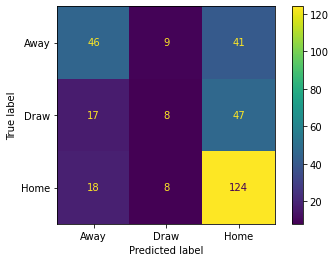

In [1086]:
plot_confusion_matrix(lr_clf, X_test, y_test,display_labels=['Away', 'Draw', 'Home'])

## Decision Tree

In [1072]:
dt_clf = Pipeline(steps =[
    ('preprocessor', preprocessor),
    ('dt', DecisionTreeClassifier())
])

In [1073]:
dt_clf.fit(X_train, y_train)

print(f'Train Accuracy: {dt_clf.score(X_train, y_train)}')
print(f'Test Accuracy: {dt_clf.score(X_test, y_test)}')

Train Accuracy: 1.0
Test Accuracy: 0.46855345911949686


In [1074]:
dt_pred = dt_clf.predict(X_test)

print(f'Test Accuracy Score: {accuracy_score(y_test, dt_pred)}')
print('-------------------')
print(f"Test Precision Score: {precision_score(y_test, dt_pred, average='micro')}")
print('-------------------')
print(f"Test Recall Score: {recall_score(y_test, dt_pred, average='micro')}")
print('-------------------')
print(f"Test F1_score: {f1_score(y_test, dt_pred, average='micro')}")
print('-------------------')

Test Accuracy Score: 0.46855345911949686
-------------------
Test Precision Score: 0.46855345911949686
-------------------
Test Recall Score: 0.46855345911949686
-------------------
Test F1_score: 0.46855345911949686
-------------------


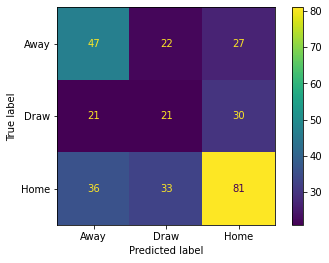

In [1075]:
plot_confusion_matrix(dt_clf, X_test, y_test,display_labels=['Away', 'Draw', 'Home'])

## Gaussin

In [1054]:
nb_clf = Pipeline(steps =[
    ('preprocessor', preprocessor),
    ('nb', GaussianNB())
])

In [1055]:
nb_clf.fit(X_train, y_train)

print(f'Train Accuracy: {nb_clf.score(X_train, y_train)}')
print(f'Test Accuracy: {nb_clf.score(X_test, y_test)}')

Train Accuracy: 0.5180863477246208
Test Accuracy: 0.5157232704402516


In [1056]:
precision_score(y_test, nb_pred, average='micro')

0.5157232704402516

In [1057]:
nb_pred = nb_clf.predict(X_test)

print(f'Test Accuracy Score: {accuracy_score(y_test, nb_pred)}')
print('-------------------')
print(f"Test Precision Score: {precision_score(y_test, nb_pred, average='micro')}")
print('-------------------')
print(f"Test Recall Score: {recall_score(y_test, nb_pred, average='micro')}")
print('-------------------')
print(f"Test F1_score: {f1_score(y_test, nb_pred, average='micro')}")
print('-------------------')

Test Accuracy Score: 0.5157232704402516
-------------------
Test Precision Score: 0.5157232704402516
-------------------
Test Recall Score: 0.5157232704402516
-------------------
Test F1_score: 0.5157232704402516
-------------------


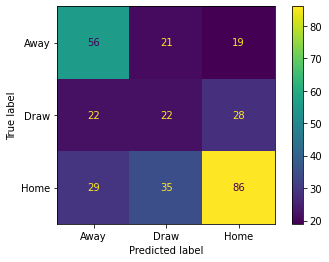

In [1058]:
plot_confusion_matrix(nb_clf, X_test, y_test,display_labels=['Away', 'Draw', 'Home'])

## XGB

In [1059]:
xgb_clf = Pipeline(steps =[
    ('preprocessor', preprocessor),
    ('xgb', xgb.XGBClassifier())
])

In [1061]:
xgb_clf.fit(X_train, y_train)

print(f'Train Accuracy: {xgb_clf.score(X_train, y_train)}')
print(f'Test Accuracy: {xgb_clf.score(X_test, y_test)}')

Train Accuracy: 1.0
Test Accuracy: 0.46855345911949686


In [1062]:
xgb_pred = xgb_clf.predict(X_test)

print(f'Test Accuracy Score: {accuracy_score(y_test, xgb_pred)}')
print('-------------------')
print(f"Test Precision Score: {precision_score(y_test, xgb_pred, average='micro')}")
print('-------------------')
print(f"Test Recall Score: {recall_score(y_test, xgb_pred, average='micro')}")
print('-------------------')
print(f"Test F1_score: {f1_score(y_test, xgb_pred, average='micro')}")
print('-------------------')

Test Accuracy Score: 0.46855345911949686
-------------------
Test Precision Score: 0.46855345911949686
-------------------
Test Recall Score: 0.46855345911949686
-------------------
Test F1_score: 0.46855345911949686
-------------------


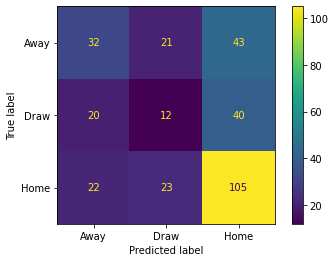

In [1063]:
plot_confusion_matrix(xgb_clf, X_test, y_test,display_labels=['Away', 'Draw', 'Home'])

## KNN

In [1064]:
knn_clf = Pipeline(steps =[
    ('preprocessor', preprocessor),
    ('knn', KNeighborsClassifier())
])

In [1065]:
knn_clf.fit(X_train, y_train)

print(f'Train Accuracy: {knn_clf.score(X_train, y_train)}')
print(f'Test Accuracy: {knn_clf.score(X_test, y_test)}')

Train Accuracy: 0.632438739789965
Test Accuracy: 0.44339622641509435


In [1066]:
knn_pred = knn_clf.predict(X_test)

print(f'Test Accuracy Score: {accuracy_score(y_test, knn_pred)}')
print('-------------------')
print(f"Test Precision Score: {precision_score(y_test, knn_pred, average='micro')}")
print('-------------------')
print(f"Test Recall Score: {recall_score(y_test, knn_pred, average='micro')}")
print('-------------------')
print(f"Test F1_score: {f1_score(y_test, knn_pred, average='micro')}")
print('-------------------')

Test Accuracy Score: 0.44339622641509435
-------------------
Test Precision Score: 0.44339622641509435
-------------------
Test Recall Score: 0.44339622641509435
-------------------
Test F1_score: 0.44339622641509435
-------------------


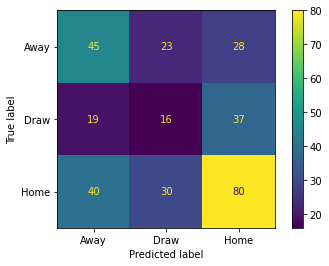

In [1067]:
plot_confusion_matrix(knn_clf, X_test, y_test,display_labels=['Away', 'Draw', 'Home'])

## SVC

In [1068]:
svc_clf = Pipeline(steps =[
    ('preprocessor', preprocessor),
    ('svc', SVC())
])

In [1069]:
svc_clf.fit(X_train, y_train)

print(f'Train Accuracy: {svc_clf.score(X_train, y_train)}')
print(f'Test Accuracy: {svc_clf.score(X_test, y_test)}')

Train Accuracy: 0.6067677946324388
Test Accuracy: 0.5628930817610063


In [1070]:
svc_pred = svc_clf.predict(X_test)

print(f'Test Accuracy Score: {accuracy_score(y_test, svc_pred)}')
print('-------------------')
print(f"Test Precision Score: {precision_score(y_test, svc_pred, average='micro')}")
print('-------------------')
print(f"Test Recall Score: {recall_score(y_test, svc_pred, average='micro')}")
print('-------------------')
print(f"Test F1_score: {f1_score(y_test, svc_pred, average='micro')}")
print('-------------------')

Test Accuracy Score: 0.5628930817610063
-------------------
Test Precision Score: 0.5628930817610063
-------------------
Test Recall Score: 0.5628930817610063
-------------------
Test F1_score: 0.5628930817610063
-------------------


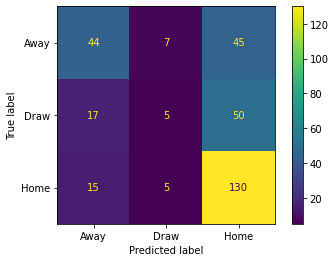

In [1071]:
plot_confusion_matrix(svc_clf, X_test, y_test,display_labels=['Away', 'Draw', 'Home'])

## GridSearchCV (SVC)

In [1076]:
params_nb = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_nb = GridSearchCV(estimator=nb_clf, 
                 param_grid=params_nb, 
                 cv=cv_method,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_nb.fit(X_train, y_train)

gs_nb.best_params_

NameError: name 'cv_method' is not defined